In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import os
import holidays
from sklearn.model_selection import train_test_split
import datetime
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import plot_importance

holidays_fr=holidays.France()
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [12]:
carac=pd.read_csv('carcteristiques_2021.csv',sep=';')

In [13]:
vehicules=pd.read_csv('vehicules-2021.csv',sep=';')

In [14]:
velo=vehicules[vehicules.catv==1]

In [15]:
accidents_velo=pd.merge(velo,carac,on='Num_Acc')

In [16]:
accidents_velo

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,occutc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202100000001,201 764,B01,1,1,0,2,1,1,5,NaN,30,11,2021,07:32,2,30,30319,1,1,1,1,CD 981,"44,0389580000","4,3480220000"
1,202100000006,201 752,B01,2,1,0,0,5,1,5,NaN,23,11,2021,11:10,1,68,68004,2,3,1,2,Rue Charles Edouard Amiot,"47,6142390000","7,2343360000"
2,202100000038,201 693,B01,1,1,0,2,1,1,5,NaN,2,9,2021,11:00,1,71,71540,2,1,1,2,Route des Perraudins,"46,7668890000","4,4566240000"
3,202100000051,201 658,A01,3,1,0,2,8,1,5,NaN,9,11,2021,23:30,5,31,31555,2,9,1,3,SQUARE DE L HERACLES,"43,6074900000","1,4281200000"
4,202100000070,201 625,B01,0,1,0,2,0,0,-1,NaN,4,11,2021,17:31,1,60,60057,2,1,1,3,Rue du Pont d’Arcole,"49,4262285502","2,0853413343"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5613,202100056346,101 181,A01,1,1,0,1,1,13,0,NaN,3,1,2021,18:20,5,94,94043,2,1,1,7,FONTAINEBLEAU (AV DE),"48,8104900000","2,3619400000"
5614,202100056362,101 157,B01,2,1,0,2,0,1,5,NaN,4,1,2021,08:20,1,64,64138,2,3,1,1,Impasse Cap-sus,"43,2309460000","-0,2765840000"
5615,202100056404,101 079,A01,1,1,0,2,1,25,5,NaN,1,1,2021,16:55,5,54,54395,2,2,1,3,MOUILLERON (RUE GABRIEL),"48,6849869839","6,1760189384"
5616,202100056424,101 041,A01,1,1,0,2,1,1,5,NaN,2,1,2021,15:40,1,75,75110,2,1,8,3,RUE DES ECLUSES SAINT MARTIN,"48,8769050000","2,3665940000"


In [17]:
df_2021=pd.merge(velo,carac,on='Num_Acc')


In [108]:
df=df_2021.copy()

,Num_Acc,id_vehicule,num_veh,senc,catv,obs,obsm,choc,manv,motor,...,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202000000011,154 742 256,B01,2,1,0,2,5,19,5,...,1,59,59143,2,3,1,-1,BEAUCHAMP (RUE LEON ),"50,6785000","2,8742000"
1,202000000014,154 742 248,B01,2,1,0,2,4,16,5,...,1,51,51454,2,7,1,2,Avenue de l’Europe,"49,2556464","4,0611947"
2,202000000031,154 742 219,A01,1,1,0,2,8,19,5,...,3,75,75117,2,3,2,3,BOULEVARD DE REIMS,"48,8891650","2,2975300"
3,202000000032,154 742 218,B01,2,1,0,2,8,1,5,...,5,75,75114,2,1,1,3,BOULEVARD ARAGO,"48,8344810","2,3342120"
4,202000000035,154 742 213,A01,2,1,0,2,5,12,5,...,5,75,75104,2,7,1,3,QUAI DE GESVRES,"48,8571810","2,3473270"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5013,202000047688,154 658 468,B01,1,1,0,2,1,1,5,...,1,49,49007,2,1,1,3,DAVIERS BOULEVARD,"47,4793100","-0,5603400"
5014,202000047714,154 658 417,B01,3,1,0,2,1,1,5,...,1,45,45285,2,3,1,3,Rue Léon Foucault-rue Charles Coulomb,"47,9126900","1,8640000"
5015,202000047721,154 658 393,A01,3,1,0,1,1,1,5,...,5,33,33063,2,1,9,6,QUAI DES CHARTRONS,"44,8499300","-0,5697700"
5016,202000047722,154 658 392,B01,1,1,0,2,2,1,5,...,1,33,33522,2,4,2,3,RUE FREDERIC SEVENE,"44,8042300","-0,5812700"


In [19]:
carac=pd.read_csv('carcteristiques_2021.csv',sep=';')
vehicules=pd.read_csv('vehicules-2021.csv',sep=';')
usagers=pd.read_csv('usagers-2021.csv',sep=';')
lieu=pd.read_csv('lieux-2021.csv',sep=';')

In [20]:
carac

,Num_Acc,jour,mois,an,hrmn,lum,dep,com,agg,int,atm,col,adr,lat,long
0,202100000001,30,11,2021,07:32,2,30,30319,1,1,1,1,CD 981,"44,0389580000","4,3480220000"
1,202100000002,25,9,2021,14:20,1,51,51544,1,3,1,3,Aire de repos croisement D20E9 après sortie D977,"49,2421290000","4,5545460000"
2,202100000003,15,7,2021,07:55,1,85,85048,2,1,7,6,15 rue François Nicolas,"46,9219500000","-0,9644600000"
3,202100000004,27,3,2021,19:45,5,93,93005,2,2,3,6,Route de Mitry,"48,9493634583","2,5196639908"
4,202100000005,25,2,2021,07:20,5,76,76429,2,1,1,2,PARIS. ROUTE DE,"49,4083800000","1,1458100000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,1,1,2021,06:10,3,33,33021,1,1,5,6,NaN,"44,5266190000","-0,1955440000"
56514,202100056515,1,1,2021,10:20,1,38,38405,1,1,2,6,D520,"45,3802910000","5,7049140000"
56515,202100056516,1,1,2021,18:00,3,26,26064,1,1,2,1,Route départementale 538,"44,9112100000","5,0196360000"
56516,202100056517,1,1,2021,10:55,1,33,33003,1,2,1,6,Voie rapide Bassens Ambes,"44,9542747363","-0,5179211363"


In [21]:
carac.drop(columns=['an','adr','com'],inplace=True)
carac.columns=['Num_Acc','jour','mois','heure','lumiere','departement',
 'agglomeration','intersection','condition_atmospherique','type_collision','lat','long']

In [22]:
carac

,Num_Acc,jour,mois,heure,lumiere,departement,agglomeration,intersection,condition_atmospherique,type_collision,lat,long
0,202100000001,30,11,07:32,2,30,1,1,1,1,"44,0389580000","4,3480220000"
1,202100000002,25,9,14:20,1,51,1,3,1,3,"49,2421290000","4,5545460000"
2,202100000003,15,7,07:55,1,85,2,1,7,6,"46,9219500000","-0,9644600000"
3,202100000004,27,3,19:45,5,93,2,2,3,6,"48,9493634583","2,5196639908"
4,202100000005,25,2,07:20,5,76,2,1,1,2,"49,4083800000","1,1458100000"
...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,1,1,06:10,3,33,1,1,5,6,"44,5266190000","-0,1955440000"
56514,202100056515,1,1,10:20,1,38,1,1,2,6,"45,3802910000","5,7049140000"
56515,202100056516,1,1,18:00,3,26,1,1,2,1,"44,9112100000","5,0196360000"
56516,202100056517,1,1,10:55,1,33,1,2,1,6,"44,9542747363","-0,5179211363"


In [23]:
def accident_velo(num):
    catv=list(vehicules[vehicules.Num_Acc==num].catv)
    return 1 in catv
    
    

In [24]:
carac['velo']=carac['Num_Acc'].apply(accident_velo)

In [25]:
carac

,Num_Acc,jour,mois,heure,lumiere,departement,agglomeration,intersection,condition_atmospherique,type_collision,lat,long,velo
0,202100000001,30,11,07:32,2,30,1,1,1,1,"44,0389580000","4,3480220000",True
1,202100000002,25,9,14:20,1,51,1,3,1,3,"49,2421290000","4,5545460000",False
2,202100000003,15,7,07:55,1,85,2,1,7,6,"46,9219500000","-0,9644600000",False
3,202100000004,27,3,19:45,5,93,2,2,3,6,"48,9493634583","2,5196639908",False
4,202100000005,25,2,07:20,5,76,2,1,1,2,"49,4083800000","1,1458100000",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,1,1,06:10,3,33,1,1,5,6,"44,5266190000","-0,1955440000",False
56514,202100056515,1,1,10:20,1,38,1,1,2,6,"45,3802910000","5,7049140000",False
56515,202100056516,1,1,18:00,3,26,1,1,2,1,"44,9112100000","5,0196360000",False
56516,202100056517,1,1,10:55,1,33,1,2,1,6,"44,9542747363","-0,5179211363",False


In [26]:
lieu

,Num_Acc,catr,voie,v1,v2,circ,nbv,vosp,prof,pr,pr1,plan,lartpc,larrout,surf,infra,situ,vma
0,202100000001,3,981,-1,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,80
1,202100000002,3,20,0,E,2,2,0,1,0,10,1,NaN,-1,1,0,1,80
2,202100000003,4,GENERAL GALLIENI (BOULEVARD DU),0,NaN,2,2,0,1,(1),(1),1,NaN,-1,1,0,1,50
3,202100000004,3,GENERAL GALLIENI (BOULEVARD DU),0,NaN,2,4,0,1,0,1,1,NaN,-1,1,0,1,50
4,202100000005,7,PARIS. ROUTE DE,-1,NaN,2,2,-1,1,11,150,1,NaN,-1,1,0,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,1,65,-1,NaN,3,4,0,2,0,454,3,NaN,-1,2,9,2,130
56514,202100056515,3,520,0,D,2,2,0,1,46,2,1,NaN,-1,5,0,3,80
56515,202100056516,3,538,-1,NaN,2,2,0,2,49,24,2,NaN,-1,2,0,1,80
56516,202100056517,4,NaN,-1,NaN,2,2,0,1,(1),(1),2,NaN,-1,2,5,3,80


In [27]:
lieu.drop(columns=['voie','v1','v2','pr','pr1','plan'],inplace=True)
lieu.columns=['Num_Acc','categorie_route','circulation','nombre_voie','voie_reservee','declivite',
             'largeur_tpc','largeur_route','etat_surface','type_infrastructure','voie_accident','limite_vitesse']

In [28]:
lieu

,Num_Acc,categorie_route,circulation,nombre_voie,voie_reservee,declivite,largeur_tpc,largeur_route,etat_surface,type_infrastructure,voie_accident,limite_vitesse
0,202100000001,3,2,2,0,1,NaN,-1,1,0,1,80
1,202100000002,3,2,2,0,1,NaN,-1,1,0,1,80
2,202100000003,4,2,2,0,1,NaN,-1,1,0,1,50
3,202100000004,3,2,4,0,1,NaN,-1,1,0,1,50
4,202100000005,7,2,2,-1,1,NaN,-1,1,0,1,50
...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,1,3,4,0,2,NaN,-1,2,9,2,130
56514,202100056515,3,2,2,0,1,NaN,-1,5,0,3,80
56515,202100056516,3,2,2,0,2,NaN,-1,2,0,1,80
56516,202100056517,4,2,2,0,1,NaN,-1,2,5,3,80


In [29]:
df=pd.merge(carac,lieu,on='Num_Acc')

In [30]:
def vacances(jour,mois):
    date=str(jour)+'/'+str(mois)+'/2021'
    return date in holidays_fr

In [31]:
df['vacances']=df.apply(lambda x: vacances(x['jour'],x['mois']),axis=1)

In [37]:
df.to_csv('dataframe.csv',index=False)

In [33]:
df

,Num_Acc,jour,mois,heure,lumiere,departement,agglomeration,intersection,condition_atmospherique,type_collision,lat,long,velo,categorie_route,circulation,nombre_voie,voie_reservee,declivite,largeur_tpc,largeur_route,etat_surface,type_infrastructure,voie_accident,limite_vitesse,vacances
0,202100000001,30,11,07:32,2,30,1,1,1,1,"44,0389580000","4,3480220000",True,3,2,2,0,1,NaN,-1,1,0,1,80,False
1,202100000002,25,9,14:20,1,51,1,3,1,3,"49,2421290000","4,5545460000",False,3,2,2,0,1,NaN,-1,1,0,1,80,False
2,202100000003,15,7,07:55,1,85,2,1,7,6,"46,9219500000","-0,9644600000",False,4,2,2,0,1,NaN,-1,1,0,1,50,False
3,202100000004,27,3,19:45,5,93,2,2,3,6,"48,9493634583","2,5196639908",False,3,2,4,0,1,NaN,-1,1,0,1,50,False
4,202100000005,25,2,07:20,5,76,2,1,1,2,"49,4083800000","1,1458100000",False,7,2,2,-1,1,NaN,-1,1,0,1,50,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56513,202100056514,1,1,06:10,3,33,1,1,5,6,"44,5266190000","-0,1955440000",False,1,3,4,0,2,NaN,-1,2,9,2,130,True
56514,202100056515,1,1,10:20,1,38,1,1,2,6,"45,3802910000","5,7049140000",False,3,2,2,0,1,NaN,-1,5,0,3,80,True
56515,202100056516,1,1,18:00,3,26,1,1,2,1,"44,9112100000","5,0196360000",False,3,2,2,0,2,NaN,-1,2,0,1,80,True
56516,202100056517,1,1,10:55,1,33,1,2,1,6,"44,9542747363","-0,5179211363",False,4,2,2,0,1,NaN,-1,2,5,3,80,True


In [34]:
df.nunique()

Num_Acc                    56518
jour                          31
mois                          12
heure                       1374
lumiere                        5
departement                  107
agglomeration                  2
intersection                   9
condition_atmospherique       10
type_collision                 8
lat                        54618
long                       54921
velo                           2
categorie_route                8
circulation                    5
nombre_voie                   14
voie_reservee                  5
declivite                      5
largeur_tpc                   19
largeur_route                 87
etat_surface                  10
type_infrastructure           11
voie_accident                  8
limite_vitesse                37
vacances                       2
dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56518 entries, 0 to 56517
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Num_Acc                  56518 non-null  int64 
 1   jour                     56518 non-null  int64 
 2   mois                     56518 non-null  int64 
 3   heure                    56518 non-null  object
 4   lumiere                  56518 non-null  int64 
 5   departement              56518 non-null  object
 6   agglomeration            56518 non-null  int64 
 7   intersection             56518 non-null  int64 
 8   condition_atmospherique  56518 non-null  int64 
 9   type_collision           56518 non-null  int64 
 10  lat                      56518 non-null  object
 11  long                     56518 non-null  object
 12  velo                     56518 non-null  bool  
 13  categorie_route          56518 non-null  int64 
 14  circulation              56518 non-nul

In [77]:
# preprocessing 
df['Date']=df['jour'].astype(str)+'/'+df['mois'].astype(str)+'/2021'+' '+df['heure'].astype(str)
df['Date']=df['Date'].astype('datetime64[ns]')
def weekday(x): return x.weekday()
df['weekday']=df['Date'].apply(weekday)
df['Date']=pd.to_numeric(df.Date-datetime.datetime.now())
df.drop(columns=['largeur_tpc','heure','Num_Acc'],inplace=True)
df['departement'].replace(['2A','2B'],'20',inplace=True)
df['departement']=df['departement'].apply(int)
df['largeur_route']=df['largeur_route'].apply(lambda x: x.replace(',','.'))
df['largeur_route']=df['largeur_route'].astype(float)

df

,jour,mois,lumiere,departement,agglomeration,intersection,condition_atmospherique,type_collision,lat,long,velo,categorie_route,circulation,nombre_voie,voie_reservee,declivite,largeur_route,etat_surface,type_infrastructure,voie_accident,limite_vitesse,vacances,Date,weekday
0,30,11,2,30,1,1,1,1,44.038958,4.348022,True,3,2,2,0,1,-1.0,1,0,1,80,False,2021-11-30 07:32:00,1
1,25,9,1,51,1,3,1,3,49.242129,4.554546,False,3,2,2,0,1,-1.0,1,0,1,80,False,2021-09-25 14:20:00,5
2,15,7,1,85,2,1,7,6,46.921950,-0.964460,False,4,2,2,0,1,-1.0,1,0,1,50,False,2021-07-15 07:55:00,3
3,27,3,5,93,2,2,3,6,48.949363,2.519664,False,3,2,4,0,1,-1.0,1,0,1,50,False,2021-03-27 19:45:00,5
4,25,2,5,76,2,1,1,2,49.408380,1.145810,False,7,2,2,-1,1,-1.0,1,0,1,50,False,2021-02-25 07:20:00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56513,1,1,3,33,1,1,5,6,44.526619,-0.195544,False,1,3,4,0,2,-1.0,2,9,2,130,True,2021-01-01 06:10:00,4
56514,1,1,1,38,1,1,2,6,45.380291,5.704914,False,3,2,2,0,1,-1.0,5,0,3,80,True,2021-01-01 10:20:00,4
56515,1,1,3,26,1,1,2,1,44.911210,5.019636,False,3,2,2,0,2,-1.0,2,0,1,80,True,2021-01-01 18:00:00,4
56516,1,1,1,33,1,2,1,6,44.954275,-0.517921,False,4,2,2,0,1,-1.0,2,5,3,80,True,2021-01-01 10:55:00,4


In [296]:
df_paris=df[df['departement']==75]
df_paris

,jour,mois,lumiere,departement,agglomeration,intersection,condition_atmospherique,type_collision,velo,categorie_route,circulation,nombre_voie,voie_reservee,declivite,largeur_route,etat_surface,type_infrastructure,voie_accident,limite_vitesse,vacances,Date,weekday
190,30,11,1,75,2,2,8,3,False,4,2,3,0,1,-1.0,2,0,1,30,False,-35241718423630000,1
239,20,11,5,75,2,2,1,3,False,4,2,3,1,1,-1.0,1,-1,6,30,False,-36138538423630000,5
348,27,10,1,75,2,3,1,3,True,4,3,6,1,2,-1.0,1,-1,5,50,False,-38188138423630000,2
430,16,10,5,75,2,3,1,6,False,4,2,2,0,1,-1.0,1,0,1,30,False,-39101338423630000,5
471,18,10,1,75,2,3,1,6,False,4,2,5,0,1,-1.0,1,0,1,30,False,-38944138423630000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56421,2,1,1,75,2,3,1,3,False,4,2,2,0,1,-1.0,1,0,1,50,False,-61333438423630000,0
56422,1,1,5,75,2,1,1,3,False,4,2,3,0,1,-1.0,1,0,1,50,True,-63993238423630000,4
56423,2,1,1,75,2,1,8,3,True,4,1,1,2,2,-1.0,1,-1,5,50,False,-61327438423630000,0
56424,1,1,5,75,2,1,1,3,False,4,1,2,0,1,-1.0,1,0,1,50,True,-63992638423630000,4


In [297]:
df_=df.copy()

In [298]:
df=df_paris.copy()

<AxesSubplot: >

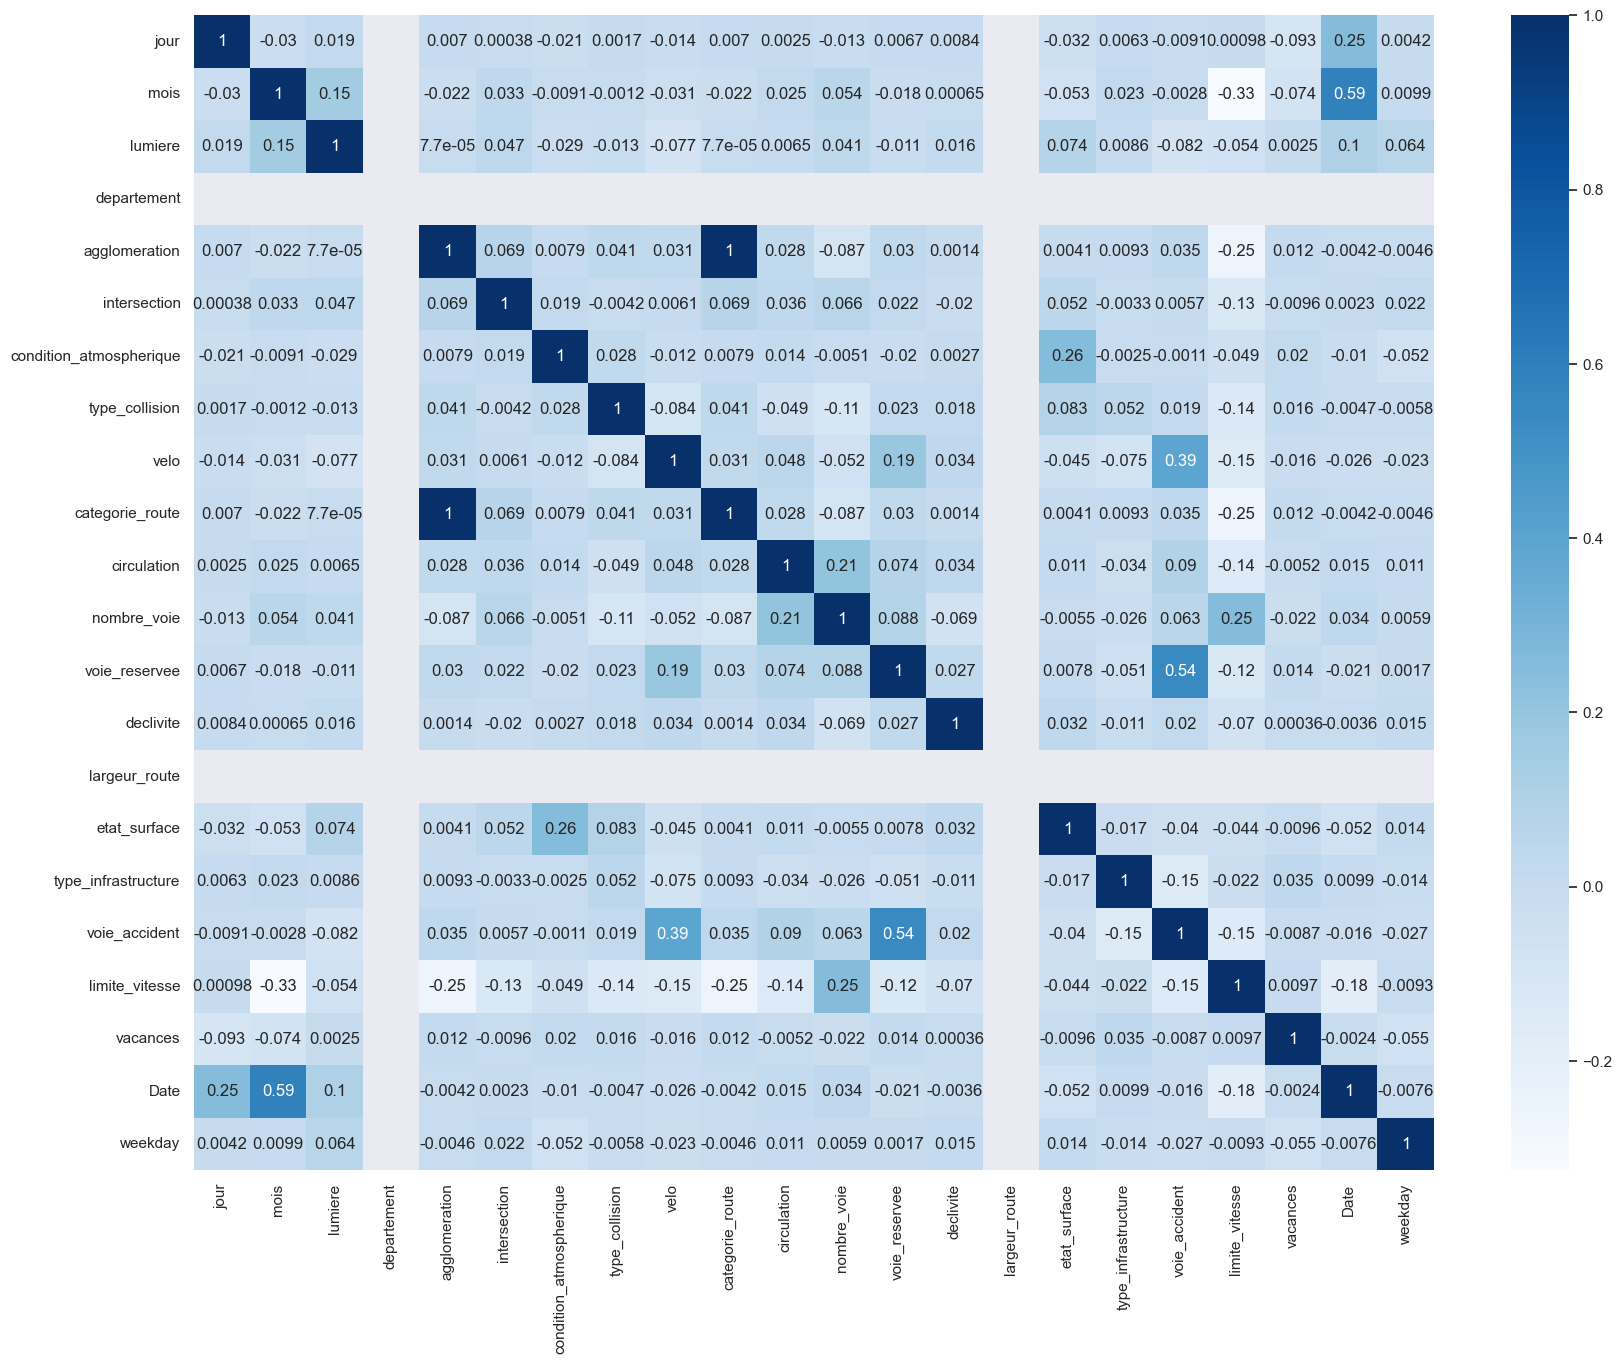

In [299]:
import seaborn as sns
corr = df.corr()
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(corr, cmap="Blues", annot=True)

In [300]:
df.voie_accident

190      1
239      6
348      5
430      1
471      1
        ..
56421    1
56422    1
56423    5
56424    1
56425    5
Name: voie_accident, Length: 5069, dtype: int64

In [301]:
X,y=df.drop(columns=['velo']),df.velo
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [302]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [303]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [305]:
y_test.mean()

0.1893491124260355

<AxesSubplot: >

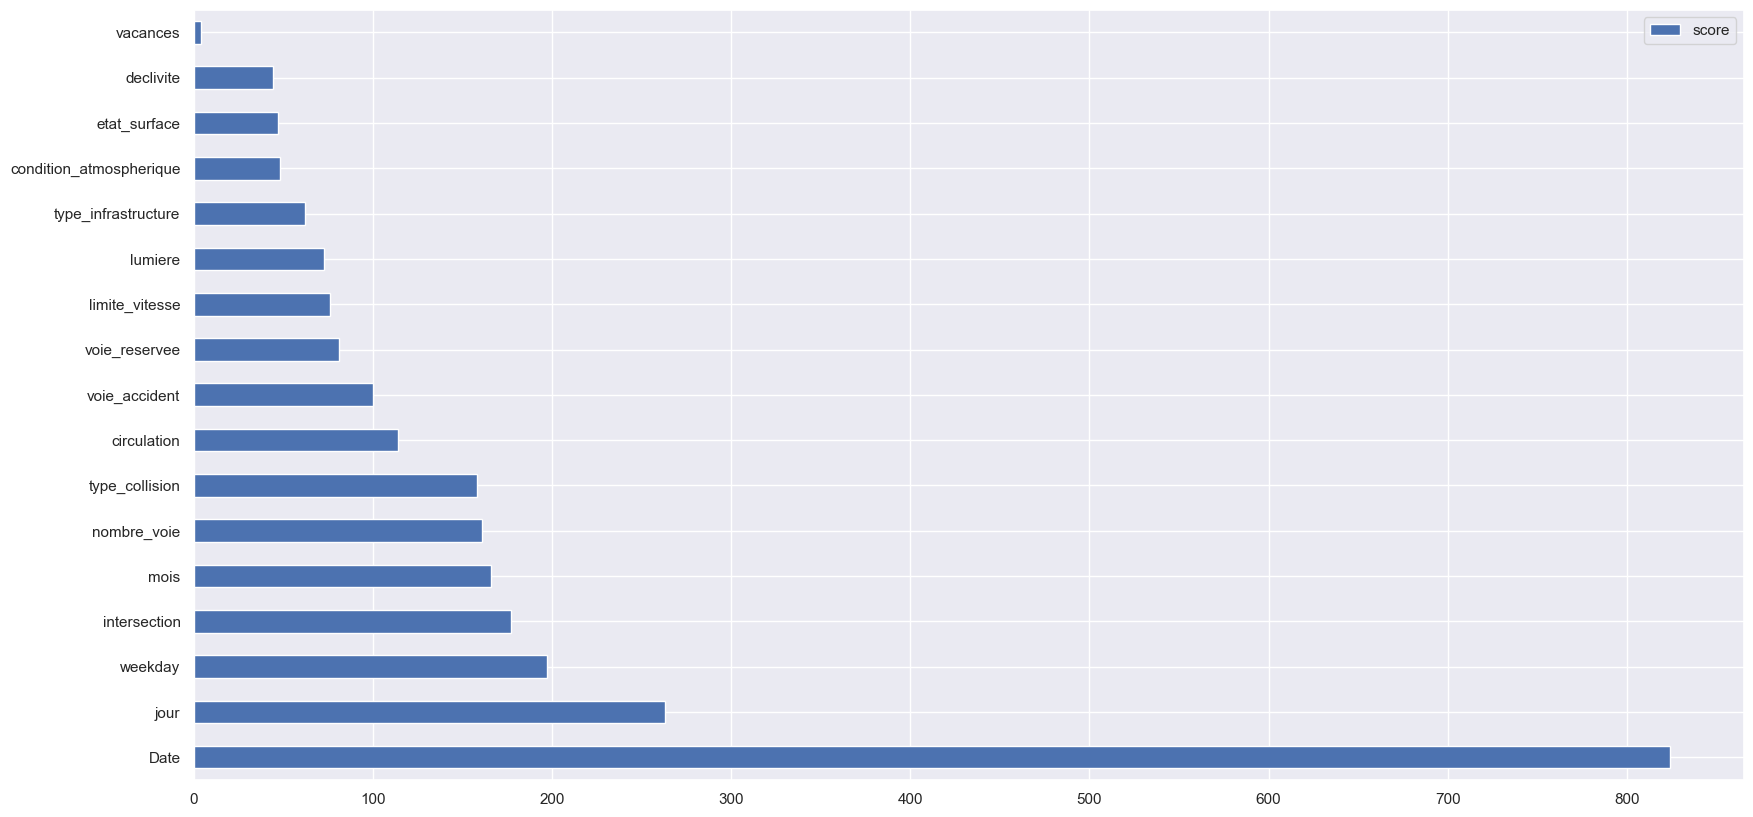

In [306]:
#Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

<AxesSubplot: >

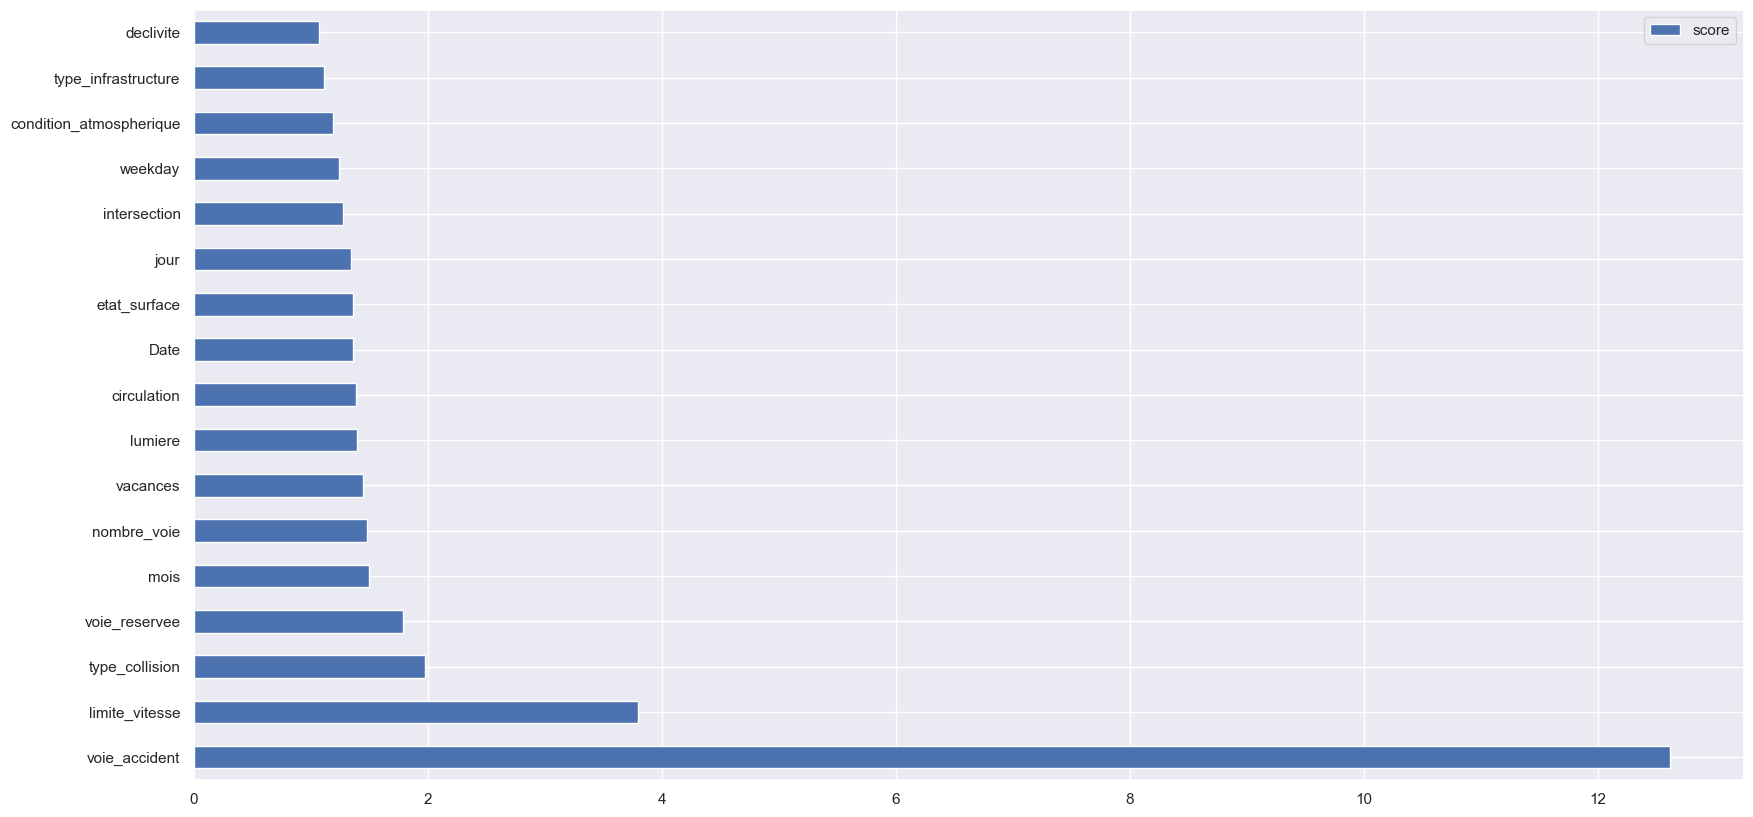

In [307]:
feature_important = model.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

<AxesSubplot: >

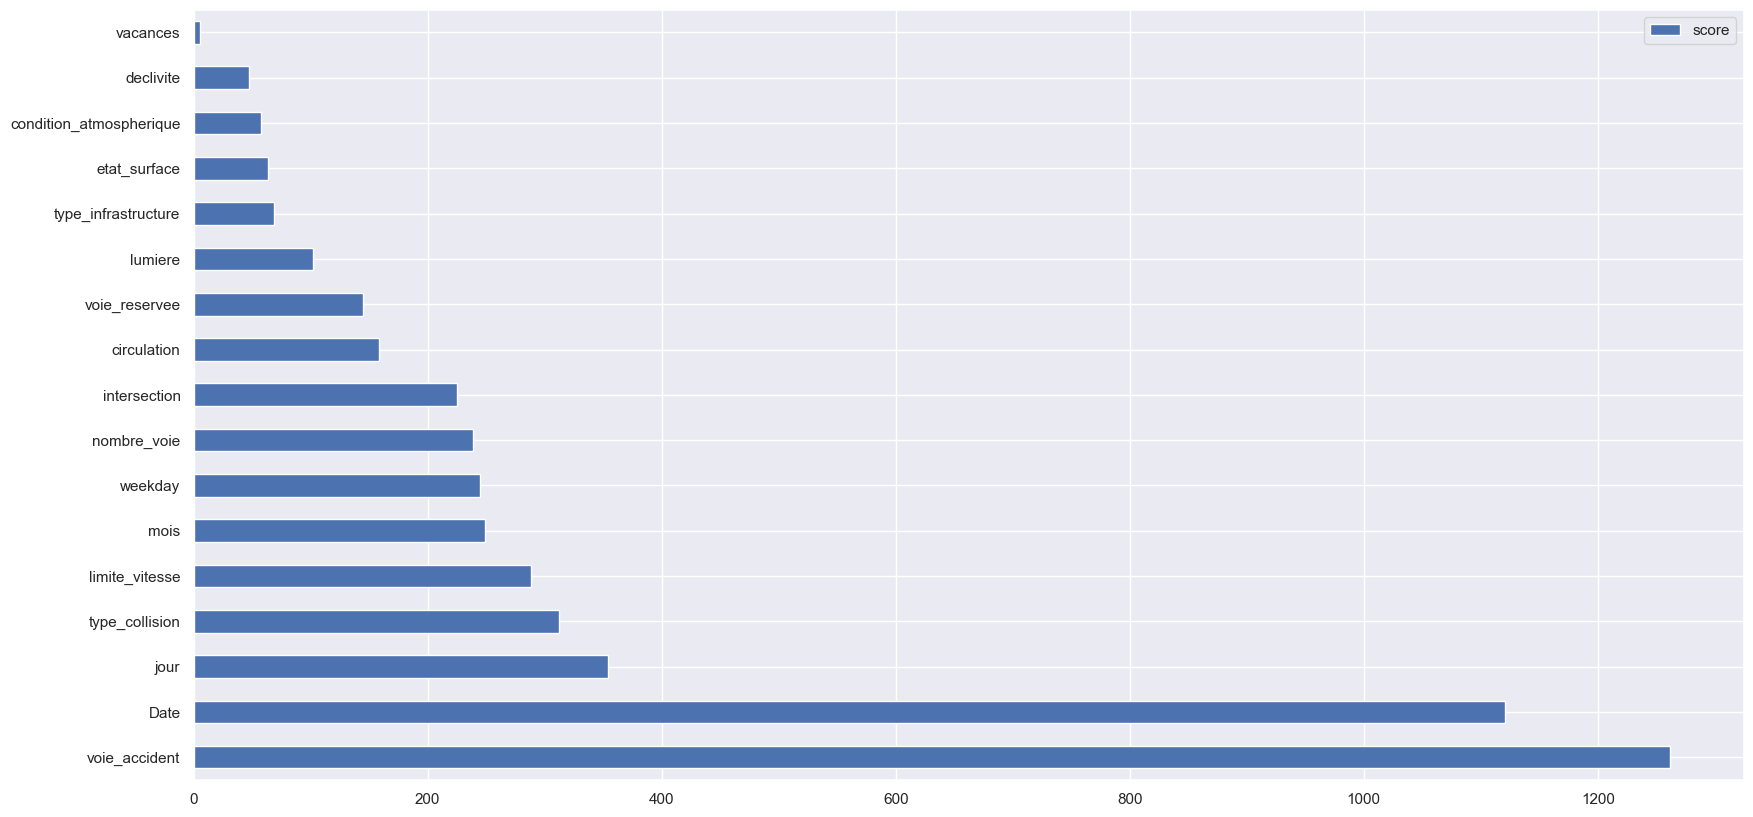

In [308]:
feature_important = model.get_booster().get_score(importance_type='total_gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

<AxesSubplot: >

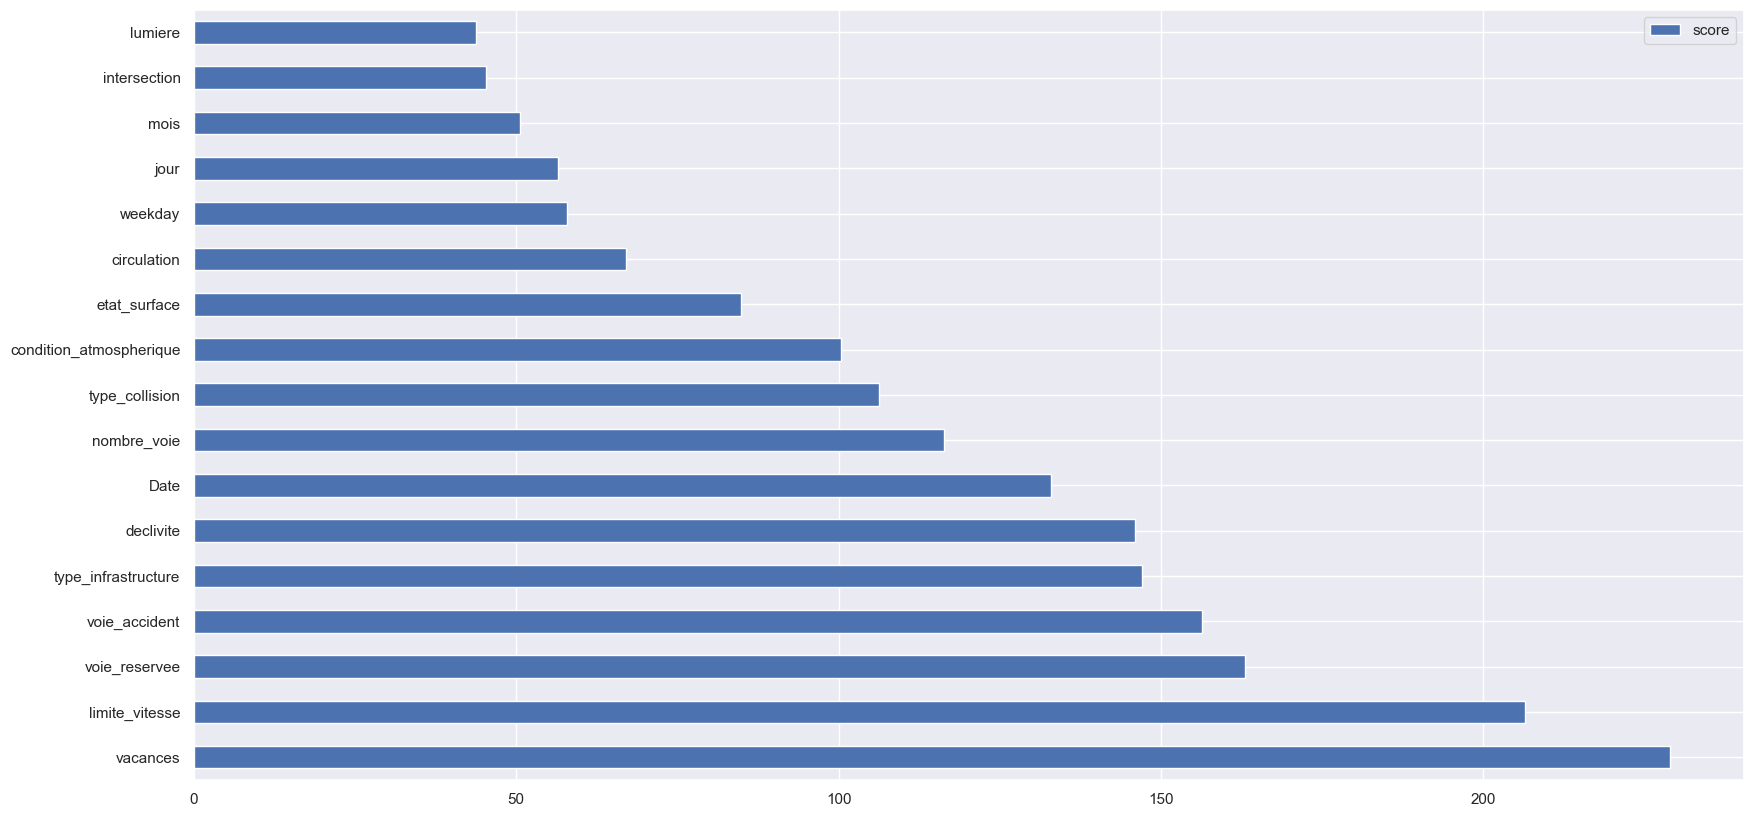

In [309]:
feature_important = model.get_booster().get_score(importance_type='cover')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [39]:
comptage=pd.read_csv('comptage-velo-donnees-compteurs.csv',sep=';')

In [40]:
comptage

,id_compteur,nom_compteur,id,name,sum_counts,date,installation_date,url_photos_n1,coordinates,counter,photos,test_lien_vers_photos_du_site_de_comptage_,id_photo_1,url_sites,type_dimage,mois_annee_comptage
0,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096,97 avenue Denfert Rochereau,0.0,2021-12-01T03:00:00+01:00,2012-02-22,https://filer.eco-counter-tools.com/file/10/6d...,"48.83504,2.33314",X2H20012081,https://filer.eco-counter-tools.com/file/10/6d...,https://filer.eco-counter-tools.com/file/10/6d...,https:,https://www.eco-visio.net/Photos/100003096,jpg,2021-12
1,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096,97 avenue Denfert Rochereau,2.0,2021-12-01T04:00:00+01:00,2012-02-22,https://filer.eco-counter-tools.com/file/10/6d...,"48.83504,2.33314",X2H20012081,https://filer.eco-counter-tools.com/file/10/6d...,https://filer.eco-counter-tools.com/file/10/6d...,https:,https://www.eco-visio.net/Photos/100003096,jpg,2021-12
2,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096,97 avenue Denfert Rochereau,0.0,2021-12-01T05:00:00+01:00,2012-02-22,https://filer.eco-counter-tools.com/file/10/6d...,"48.83504,2.33314",X2H20012081,https://filer.eco-counter-tools.com/file/10/6d...,https://filer.eco-counter-tools.com/file/10/6d...,https:,https://www.eco-visio.net/Photos/100003096,jpg,2021-12
3,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096,97 avenue Denfert Rochereau,213.0,2021-12-01T08:00:00+01:00,2012-02-22,https://filer.eco-counter-tools.com/file/10/6d...,"48.83504,2.33314",X2H20012081,https://filer.eco-counter-tools.com/file/10/6d...,https://filer.eco-counter-tools.com/file/10/6d...,https:,https://www.eco-visio.net/Photos/100003096,jpg,2021-12
4,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096,97 avenue Denfert Rochereau,84.0,2021-12-01T07:00:00+01:00,2012-02-22,https://filer.eco-counter-tools.com/file/10/6d...,"48.83504,2.33314",X2H20012081,https://filer.eco-counter-tools.com/file/10/6d...,https://filer.eco-counter-tools.com/file/10/6d...,https:,https://www.eco-visio.net/Photos/100003096,jpg,2021-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910755,300021320-353293614,69 Boulevard Ornano N-S,300021320,69 Boulevard Ornano,0.0,2023-01-15T05:00:00+01:00,2021-11-30,https://filer.eco-counter-tools.com/file/e1/da...,"48.89683,2.34521",Y2H21110997,https://filer.eco-counter-tools.com/file/e1/da...,https://filer.eco-counter-tools.com/file/e1/da...,https:,https://www.eco-visio.net/Photos/300021320,jpg,2023-01
910756,300021320-353293614,69 Boulevard Ornano N-S,300021320,69 Boulevard Ornano,0.0,2023-01-15T13:00:00+01:00,2021-11-30,https://filer.eco-counter-tools.com/file/e1/da...,"48.89683,2.34521",Y2H21110997,https://filer.eco-counter-tools.com/file/e1/da...,https://filer.eco-counter-tools.com/file/e1/da...,https:,https://www.eco-visio.net/Photos/300021320,jpg,2023-01
910757,300021320-353293614,69 Boulevard Ornano N-S,300021320,69 Boulevard Ornano,0.0,2023-01-15T14:00:00+01:00,2021-11-30,https://filer.eco-counter-tools.com/file/e1/da...,"48.89683,2.34521",Y2H21110997,https://filer.eco-counter-tools.com/file/e1/da...,https://filer.eco-counter-tools.com/file/e1/da...,https:,https://www.eco-visio.net/Photos/300021320,jpg,2023-01
910758,300021320-353293614,69 Boulevard Ornano N-S,300021320,69 Boulevard Ornano,0.0,2023-01-15T17:00:00+01:00,2021-11-30,https://filer.eco-counter-tools.com/file/e1/da...,"48.89683,2.34521",Y2H21110997,https://filer.eco-counter-tools.com/file/e1/da...,https://filer.eco-counter-tools.com/file/e1/da...,https:,https://www.eco-visio.net/Photos/300021320,jpg,2023-01


In [44]:
comptage.coordinates

'48.83504,2.33314'

In [49]:
def lat(x):
    a=x.split(',')
    return float(a[0])
def long(x):
    a=x.split(',')
    return float(a[1])

In [50]:
comptage['lat']=comptage.coordinates.apply(lat)
comptage['long']=comptage.coordinates.apply(long)

In [51]:
comptage

,id_compteur,nom_compteur,id,name,sum_counts,date,installation_date,url_photos_n1,coordinates,counter,photos,test_lien_vers_photos_du_site_de_comptage_,id_photo_1,url_sites,type_dimage,mois_annee_comptage,lat,long
0,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096,97 avenue Denfert Rochereau,0.0,2021-12-01T03:00:00+01:00,2012-02-22,https://filer.eco-counter-tools.com/file/10/6d...,"48.83504,2.33314",X2H20012081,https://filer.eco-counter-tools.com/file/10/6d...,https://filer.eco-counter-tools.com/file/10/6d...,https:,https://www.eco-visio.net/Photos/100003096,jpg,2021-12,48.83504,2.33314
1,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096,97 avenue Denfert Rochereau,2.0,2021-12-01T04:00:00+01:00,2012-02-22,https://filer.eco-counter-tools.com/file/10/6d...,"48.83504,2.33314",X2H20012081,https://filer.eco-counter-tools.com/file/10/6d...,https://filer.eco-counter-tools.com/file/10/6d...,https:,https://www.eco-visio.net/Photos/100003096,jpg,2021-12,48.83504,2.33314
2,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096,97 avenue Denfert Rochereau,0.0,2021-12-01T05:00:00+01:00,2012-02-22,https://filer.eco-counter-tools.com/file/10/6d...,"48.83504,2.33314",X2H20012081,https://filer.eco-counter-tools.com/file/10/6d...,https://filer.eco-counter-tools.com/file/10/6d...,https:,https://www.eco-visio.net/Photos/100003096,jpg,2021-12,48.83504,2.33314
3,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096,97 avenue Denfert Rochereau,213.0,2021-12-01T08:00:00+01:00,2012-02-22,https://filer.eco-counter-tools.com/file/10/6d...,"48.83504,2.33314",X2H20012081,https://filer.eco-counter-tools.com/file/10/6d...,https://filer.eco-counter-tools.com/file/10/6d...,https:,https://www.eco-visio.net/Photos/100003096,jpg,2021-12,48.83504,2.33314
4,100003096-353242251,97 avenue Denfert Rochereau SO-NE,100003096,97 avenue Denfert Rochereau,84.0,2021-12-01T07:00:00+01:00,2012-02-22,https://filer.eco-counter-tools.com/file/10/6d...,"48.83504,2.33314",X2H20012081,https://filer.eco-counter-tools.com/file/10/6d...,https://filer.eco-counter-tools.com/file/10/6d...,https:,https://www.eco-visio.net/Photos/100003096,jpg,2021-12,48.83504,2.33314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
910755,300021320-353293614,69 Boulevard Ornano N-S,300021320,69 Boulevard Ornano,0.0,2023-01-15T05:00:00+01:00,2021-11-30,https://filer.eco-counter-tools.com/file/e1/da...,"48.89683,2.34521",Y2H21110997,https://filer.eco-counter-tools.com/file/e1/da...,https://filer.eco-counter-tools.com/file/e1/da...,https:,https://www.eco-visio.net/Photos/300021320,jpg,2023-01,48.89683,2.34521
910756,300021320-353293614,69 Boulevard Ornano N-S,300021320,69 Boulevard Ornano,0.0,2023-01-15T13:00:00+01:00,2021-11-30,https://filer.eco-counter-tools.com/file/e1/da...,"48.89683,2.34521",Y2H21110997,https://filer.eco-counter-tools.com/file/e1/da...,https://filer.eco-counter-tools.com/file/e1/da...,https:,https://www.eco-visio.net/Photos/300021320,jpg,2023-01,48.89683,2.34521
910757,300021320-353293614,69 Boulevard Ornano N-S,300021320,69 Boulevard Ornano,0.0,2023-01-15T14:00:00+01:00,2021-11-30,https://filer.eco-counter-tools.com/file/e1/da...,"48.89683,2.34521",Y2H21110997,https://filer.eco-counter-tools.com/file/e1/da...,https://filer.eco-counter-tools.com/file/e1/da...,https:,https://www.eco-visio.net/Photos/300021320,jpg,2023-01,48.89683,2.34521
910758,300021320-353293614,69 Boulevard Ornano N-S,300021320,69 Boulevard Ornano,0.0,2023-01-15T17:00:00+01:00,2021-11-30,https://filer.eco-counter-tools.com/file/e1/da...,"48.89683,2.34521",Y2H21110997,https://filer.eco-counter-tools.com/file/e1/da...,https://filer.eco-counter-tools.com/file/e1/da...,https:,https://www.eco-visio.net/Photos/300021320,jpg,2023-01,48.89683,2.34521


In [41]:
data=pd.read_csv('dataframe.csv')

In [42]:
data[data.departement=='75']

,Num_Acc,jour,mois,heure,lumiere,departement,agglomeration,intersection,condition_atmospherique,type_collision,lat,long,velo,categorie_route,circulation,nombre_voie,voie_reservee,declivite,largeur_tpc,largeur_route,etat_surface,type_infrastructure,voie_accident,limite_vitesse,vacances
190,202100000191,30,11,13:42,1,75,2,2,8,3,"48,8846000000","2,3796500000",False,4,2,3,0,1,NaN,-1,2,0,1,30,False
239,202100000240,20,11,04:35,5,75,2,2,1,3,"48,8706880000","2,3479170000",False,4,2,3,1,1,NaN,-1,1,-1,6,30,False
348,202100000349,27,10,11:15,1,75,2,3,1,3,"48,8804910000","2,3129920000",True,4,3,6,1,2,NaN,-1,1,-1,5,50,False
430,202100000431,16,10,21:35,5,75,2,3,1,6,"48,8489880000","2,3341130000",False,4,2,2,0,1,NaN,-1,1,0,1,30,False
471,202100000472,18,10,17:15,1,75,2,3,1,6,"48,8670300000","2,3529760000",False,4,2,5,0,1,NaN,-1,1,0,1,30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56421,202100056422,2,1,14:00,1,75,2,3,1,3,"48,8461110000","2,3142480000",False,4,2,2,0,1,NaN,-1,1,0,1,50,False
56422,202100056423,1,1,19:10,5,75,2,1,1,3,"48,8286270000","2,3732090000",False,4,2,3,0,1,NaN,-1,1,0,1,50,True
56423,202100056424,2,1,15:40,1,75,2,1,8,3,"48,8769050000","2,3665940000",True,4,1,1,2,2,NaN,-1,1,-1,5,50,False
56424,202100056425,1,1,19:20,5,75,2,1,1,3,"48,8792160000","2,3686000000",False,4,1,2,0,1,NaN,-1,1,0,1,50,True


In [56]:
data['lat']=data.lat.apply(lambda x: float(x.replace(',','.')))
data['long']=data.long.apply(lambda x: float(x.replace(',','.')))

In [72]:
data[data.departement=='75']

,Num_Acc,jour,mois,heure,lumiere,departement,agglomeration,intersection,condition_atmospherique,type_collision,lat,long,velo,categorie_route,circulation,nombre_voie,voie_reservee,declivite,largeur_tpc,largeur_route,etat_surface,type_infrastructure,voie_accident,limite_vitesse,vacances
190,202100000191,30,11,13:42,1,75,2,2,8,3,48.884600,2.379650,False,4,2,3,0,1,NaN,-1,2,0,1,30,False
239,202100000240,20,11,04:35,5,75,2,2,1,3,48.870688,2.347917,False,4,2,3,1,1,NaN,-1,1,-1,6,30,False
348,202100000349,27,10,11:15,1,75,2,3,1,3,48.880491,2.312992,True,4,3,6,1,2,NaN,-1,1,-1,5,50,False
430,202100000431,16,10,21:35,5,75,2,3,1,6,48.848988,2.334113,False,4,2,2,0,1,NaN,-1,1,0,1,30,False
471,202100000472,18,10,17:15,1,75,2,3,1,6,48.867030,2.352976,False,4,2,5,0,1,NaN,-1,1,0,1,30,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56421,202100056422,2,1,14:00,1,75,2,3,1,3,48.846111,2.314248,False,4,2,2,0,1,NaN,-1,1,0,1,50,False
56422,202100056423,1,1,19:10,5,75,2,1,1,3,48.828627,2.373209,False,4,2,3,0,1,NaN,-1,1,0,1,50,True
56423,202100056424,2,1,15:40,1,75,2,1,8,3,48.876905,2.366594,True,4,1,1,2,2,NaN,-1,1,-1,5,50,False
56424,202100056425,1,1,19:20,5,75,2,1,1,3,48.879216,2.368600,False,4,1,2,0,1,NaN,-1,1,0,1,50,True


In [88]:
from scipy import spatial
compteurs = list(zip(comptage.lat, comptage.long))
tree = spatial.KDTree(compteurs)
def closest(x):
    cpt=tree.query(x)
    return comptage.id_compteur[cpt[1]]
    


In [73]:
closest([48.884600,2.379650])

(0.0065265764379200284, 461905)

In [79]:
df['coordinates']=list(zip(df.lat, df.long))

In [84]:
df_paris=df[df.departement==75]

In [92]:
df_paris['closest_compteur']=df_paris.coordinates.apply(closest)

/var/folders/y6/khmhfgcd2qq7v548f36tk6680000gn/T/ipykernel_2295/3884369103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paris['closest_compteur']=df_paris.coordinates.apply(closest)


In [93]:
df_paris

,jour,mois,lumiere,departement,agglomeration,intersection,condition_atmospherique,type_collision,lat,long,velo,categorie_route,circulation,nombre_voie,voie_reservee,declivite,largeur_route,etat_surface,type_infrastructure,voie_accident,limite_vitesse,vacances,Date,weekday,coordinates,closest_compteur
190,30,11,1,75,2,2,8,3,48.884600,2.379650,False,4,2,3,0,1,-1.0,2,0,1,30,False,2021-11-30 13:42:00,1,"(48.8846, 2.37965)",100056034-101056034
239,20,11,5,75,2,2,1,3,48.870688,2.347917,False,4,2,3,1,1,-1.0,1,-1,6,30,False,2021-11-20 04:35:00,5,"(48.870688, 2.347917)",100003097-101003097
348,27,10,1,75,2,3,1,3,48.880491,2.312992,True,4,3,6,1,2,-1.0,1,-1,5,50,False,2021-10-27 11:15:00,2,"(48.880491, 2.312992)",100056038-101056038
430,16,10,5,75,2,3,1,6,48.848988,2.334113,False,4,2,2,0,1,-1.0,1,0,1,30,False,2021-10-16 21:35:00,5,"(48.848988, 2.334113)",100049407-353255860
471,18,10,1,75,2,3,1,6,48.867030,2.352976,False,4,2,5,0,1,-1.0,1,0,1,30,False,2021-10-18 17:15:00,0,"(48.86703, 2.352976)",100056334-104056334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56421,2,1,1,75,2,3,1,3,48.846111,2.314248,False,4,2,2,0,1,-1.0,1,0,1,50,False,2021-02-01 14:00:00,0,"(48.846111, 2.314248)",100060178-101060178
56422,1,1,5,75,2,1,1,3,48.828627,2.373209,False,4,2,3,0,1,-1.0,1,0,1,50,True,2021-01-01 19:10:00,4,"(48.828627, 2.373209)",100036718-104036718
56423,2,1,1,75,2,1,8,3,48.876905,2.366594,True,4,1,1,2,2,-1.0,1,-1,5,50,False,2021-02-01 15:40:00,0,"(48.876905, 2.366594)",100047533-101047533
56424,1,1,5,75,2,1,1,3,48.879216,2.368600,False,4,1,2,0,1,-1.0,1,0,1,50,True,2021-01-01 19:20:00,4,"(48.879216, 2.3686)",100047545-104047545


In [173]:
def function(x):
    id_cpt,pivot=x[0],x[1]
    items= comptage[comptage.id_compteur==id_cpt].date
    d=min(items, key=lambda y: abs(y - pivot))
    return comptage[(comptage.id_compteur==id_cpt)&(comptage.date==d)].sum_counts.mean()
   


In [157]:

date=df_paris.Date[0]
num='100056034-101056034'
x=(num,date)


In [160]:
function(x)

(4.0, 1)

In [163]:
df_paris

,index,jour,mois,lumiere,departement,agglomeration,intersection,condition_atmospherique,type_collision,lat,long,velo,categorie_route,circulation,nombre_voie,voie_reservee,declivite,largeur_route,etat_surface,type_infrastructure,voie_accident,limite_vitesse,vacances,Date,weekday,coordinates,closest_compteur
0,190,30,11,1,75,2,2,8,3,48.884600,2.379650,False,4,2,3,0,1,-1.0,2,0,1,30,False,2021-11-30 13:42:00,1,"(48.8846, 2.37965)",100056034-101056034
1,239,20,11,5,75,2,2,1,3,48.870688,2.347917,False,4,2,3,1,1,-1.0,1,-1,6,30,False,2021-11-20 04:35:00,5,"(48.870688, 2.347917)",100003097-101003097
2,348,27,10,1,75,2,3,1,3,48.880491,2.312992,True,4,3,6,1,2,-1.0,1,-1,5,50,False,2021-10-27 11:15:00,2,"(48.880491, 2.312992)",100056038-101056038
3,430,16,10,5,75,2,3,1,6,48.848988,2.334113,False,4,2,2,0,1,-1.0,1,0,1,30,False,2021-10-16 21:35:00,5,"(48.848988, 2.334113)",100049407-353255860
4,471,18,10,1,75,2,3,1,6,48.867030,2.352976,False,4,2,5,0,1,-1.0,1,0,1,30,False,2021-10-18 17:15:00,0,"(48.86703, 2.352976)",100056334-104056334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5064,56421,2,1,1,75,2,3,1,3,48.846111,2.314248,False,4,2,2,0,1,-1.0,1,0,1,50,False,2021-02-01 14:00:00,0,"(48.846111, 2.314248)",100060178-101060178
5065,56422,1,1,5,75,2,1,1,3,48.828627,2.373209,False,4,2,3,0,1,-1.0,1,0,1,50,True,2021-01-01 19:10:00,4,"(48.828627, 2.373209)",100036718-104036718
5066,56423,2,1,1,75,2,1,8,3,48.876905,2.366594,True,4,1,1,2,2,-1.0,1,-1,5,50,False,2021-02-01 15:40:00,0,"(48.876905, 2.366594)",100047533-101047533
5067,56424,1,1,5,75,2,1,1,3,48.879216,2.368600,False,4,1,2,0,1,-1.0,1,0,1,50,True,2021-01-01 19:20:00,4,"(48.879216, 2.3686)",100047545-104047545


In [169]:
def test(x):
    return x[0]

In [175]:
df_paris['traffic']=df_paris[['closest_compteur','Date']].apply(function,axis=1)

/var/folders/y6/khmhfgcd2qq7v548f36tk6680000gn/T/ipykernel_2295/3314088603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paris['traffic']=df_paris[['closest_compteur','Date']].apply(function,axis=1)


In [172]:
comptage['date']=pd.to_datetime(comptage.date)

In [132]:
comptage['date']=comptage['date'].apply(lambda x: x.replace(tzinfo=None))

In [133]:
comptage['date']

0        2021-12-01 03:00:00
1        2021-12-01 04:00:00
2        2021-12-01 05:00:00
3        2021-12-01 08:00:00
4        2021-12-01 07:00:00
                 ...        
910755   2023-01-15 05:00:00
910756   2023-01-15 13:00:00
910757   2023-01-15 14:00:00
910758   2023-01-15 17:00:00
910759   2023-01-15 21:00:00
Name: date, Length: 910760, dtype: datetime64[ns]

In [179]:
df_paris

,index,jour,mois,lumiere,departement,agglomeration,intersection,condition_atmospherique,type_collision,lat,long,velo,categorie_route,circulation,nombre_voie,voie_reservee,declivite,largeur_route,etat_surface,type_infrastructure,voie_accident,limite_vitesse,vacances,Date,weekday,coordinates,closest_compteur,traffic
0,190,30,11,1,75,2,2,8,3,48.884600,2.379650,False,4,2,3,0,1,-1.0,2,0,1,30,False,2021-11-30 13:42:00,1,"(48.8846, 2.37965)",100056034-101056034,4.0
1,239,20,11,5,75,2,2,1,3,48.870688,2.347917,False,4,2,3,1,1,-1.0,1,-1,6,30,False,2021-11-20 04:35:00,5,"(48.870688, 2.347917)",100003097-101003097,4.0
2,348,27,10,1,75,2,3,1,3,48.880491,2.312992,True,4,3,6,1,2,-1.0,1,-1,5,50,False,2021-10-27 11:15:00,2,"(48.880491, 2.312992)",100056038-101056038,2.0
3,430,16,10,5,75,2,3,1,6,48.848988,2.334113,False,4,2,2,0,1,-1.0,1,0,1,30,False,2021-10-16 21:35:00,5,"(48.848988, 2.334113)",100049407-353255860,1.0
4,471,18,10,1,75,2,3,1,6,48.867030,2.352976,False,4,2,5,0,1,-1.0,1,0,1,30,False,2021-10-18 17:15:00,0,"(48.86703, 2.352976)",100056334-104056334,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5064,56421,2,1,1,75,2,3,1,3,48.846111,2.314248,False,4,2,2,0,1,-1.0,1,0,1,50,False,2021-02-01 14:00:00,0,"(48.846111, 2.314248)",100060178-101060178,0.0
5065,56422,1,1,5,75,2,1,1,3,48.828627,2.373209,False,4,2,3,0,1,-1.0,1,0,1,50,True,2021-01-01 19:10:00,4,"(48.828627, 2.373209)",100036718-104036718,5.0
5066,56423,2,1,1,75,2,1,8,3,48.876905,2.366594,True,4,1,1,2,2,-1.0,1,-1,5,50,False,2021-02-01 15:40:00,0,"(48.876905, 2.366594)",100047533-101047533,11.0
5067,56424,1,1,5,75,2,1,1,3,48.879216,2.368600,False,4,1,2,0,1,-1.0,1,0,1,50,True,2021-01-01 19:20:00,4,"(48.879216, 2.3686)",100047545-104047545,1.0


In [ ]:
df_paris.drop(columns='index').reset_index().to_csv('data.csv',index=False)

In [2]:
df=pd.read_csv('data.csv')
df

,index,jour,mois,lumiere,departement,agglomeration,intersection,condition_atmospherique,type_collision,lat,long,velo,categorie_route,circulation,nombre_voie,voie_reservee,declivite,largeur_route,etat_surface,type_infrastructure,voie_accident,limite_vitesse,vacances,Date,weekday,coordinates,closest_compteur,traffic
0,0,30,11,1,75,2,2,8,3,48.884600,2.379650,False,4,2,3,0,1,-1.0,2,0,1,30,False,2021-11-30 13:42:00,1,"(48.8846, 2.37965)",100056034-101056034,4.0
1,1,20,11,5,75,2,2,1,3,48.870688,2.347917,False,4,2,3,1,1,-1.0,1,-1,6,30,False,2021-11-20 04:35:00,5,"(48.870688, 2.347917)",100003097-101003097,4.0
2,2,27,10,1,75,2,3,1,3,48.880491,2.312992,True,4,3,6,1,2,-1.0,1,-1,5,50,False,2021-10-27 11:15:00,2,"(48.880491, 2.312992)",100056038-101056038,2.0
3,3,16,10,5,75,2,3,1,6,48.848988,2.334113,False,4,2,2,0,1,-1.0,1,0,1,30,False,2021-10-16 21:35:00,5,"(48.848988, 2.334113)",100049407-353255860,1.0
4,4,18,10,1,75,2,3,1,6,48.867030,2.352976,False,4,2,5,0,1,-1.0,1,0,1,30,False,2021-10-18 17:15:00,0,"(48.86703, 2.352976)",100056334-104056334,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5064,5064,2,1,1,75,2,3,1,3,48.846111,2.314248,False,4,2,2,0,1,-1.0,1,0,1,50,False,2021-02-01 14:00:00,0,"(48.846111, 2.314248)",100060178-101060178,0.0
5065,5065,1,1,5,75,2,1,1,3,48.828627,2.373209,False,4,2,3,0,1,-1.0,1,0,1,50,True,2021-01-01 19:10:00,4,"(48.828627, 2.373209)",100036718-104036718,5.0
5066,5066,2,1,1,75,2,1,8,3,48.876905,2.366594,True,4,1,1,2,2,-1.0,1,-1,5,50,False,2021-02-01 15:40:00,0,"(48.876905, 2.366594)",100047533-101047533,11.0
5067,5067,1,1,5,75,2,1,1,3,48.879216,2.368600,False,4,1,2,0,1,-1.0,1,0,1,50,True,2021-01-01 19:20:00,4,"(48.879216, 2.3686)",100047545-104047545,1.0


In [4]:
df['Date']=pd.to_datetime(df.Date.apply(lambda x: x.replace(',','.')))

In [5]:
df['Date']=pd.to_numeric(df.Date-datetime.datetime.now())

In [6]:
df.drop(columns=['index','departement','lat','long','coordinates','closest_compteur'],inplace=True)

In [7]:
X,y=df.drop(columns=['velo']),df.velo
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [9]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.73%


In [11]:
(1-y_test.mean())*100

81.06508875739645

In [12]:
y_pred = model.predict(X_train)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_train, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 95.12%


<AxesSubplot: >

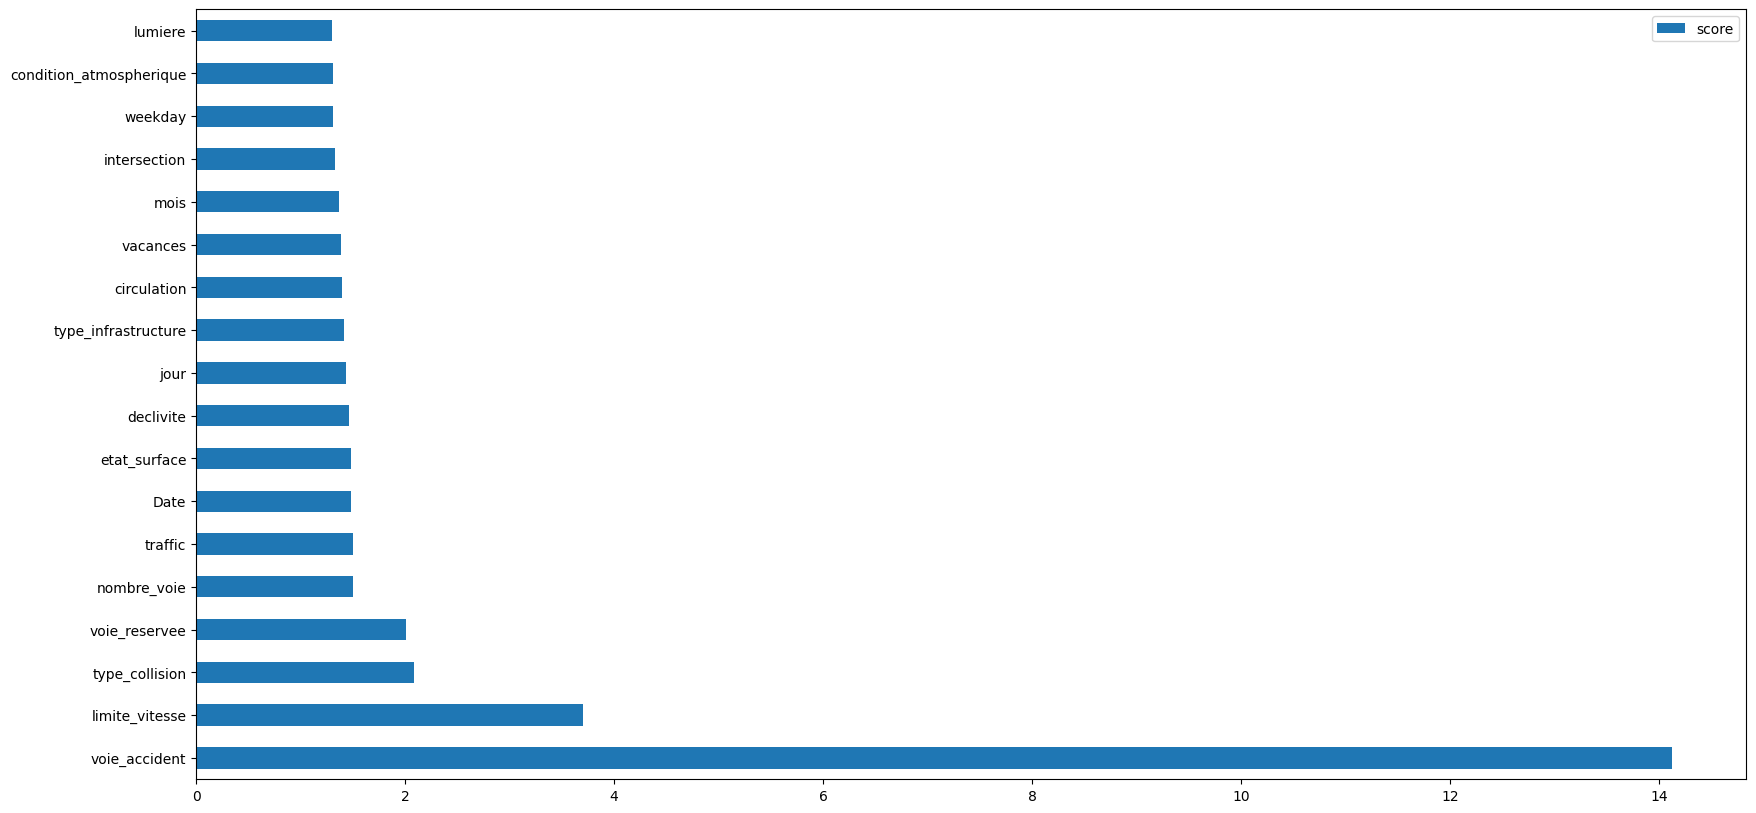

In [13]:
feature_important = model.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

In [15]:
df_paris=df.copy()

In [17]:
df_paris[df_paris['velo']==True].voie_accident.value_counts()

1    518
5    429
6     65
4     13
Name: voie_accident, dtype: int64

In [19]:
import plotly.express as px

In [39]:
#For plotting bar graphs
def plot_bar_graph(df,col1,col2,title,agg=np.mean):
    df_grouped= df.groupby([col1])[col2].agg(agg)
    d={col1:list(df_grouped.index),col2:df_grouped.values}
    df_plot=pd.DataFrame(data=d)
    fig = px.bar(df_plot, x=col1, y=col2,title=title)
    fig.show()
    

In [25]:
df_paris["Voie de l'accident "]=df['voie_accident'].apply(lambda x:'Piste cyclable' if x==5 else 'Autres voies' )

<AxesSubplot: title={'center': ' Répartition des accidents (%)'}>

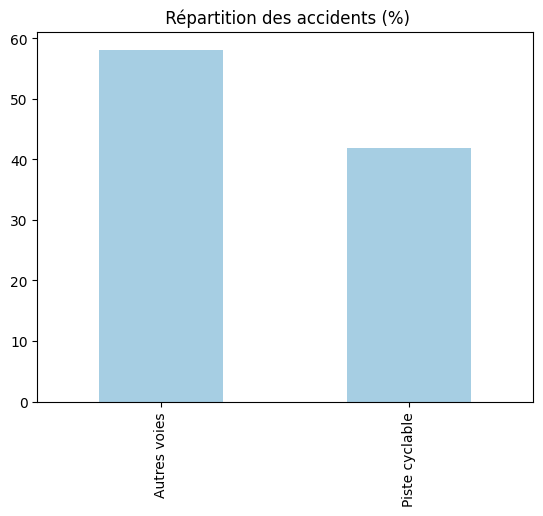

In [46]:
(df_bar["Voie de l'accident "].value_counts()*100/len(df_bar)).plot(kind='bar',title=' Répartition des accidents (%)',colormap='Paired')

In [36]:
df_bar["Voie de l'accident "].value_counts()

Autres voies      596
Piste cyclable    429
Name: Voie de l'accident , dtype: int64

In [213]:
df_corr=df_paris[df_paris['velo']==True]

/var/folders/y6/khmhfgcd2qq7v548f36tk6680000gn/T/ipykernel_2295/660484846.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_corr.corr()


<AxesSubplot: >

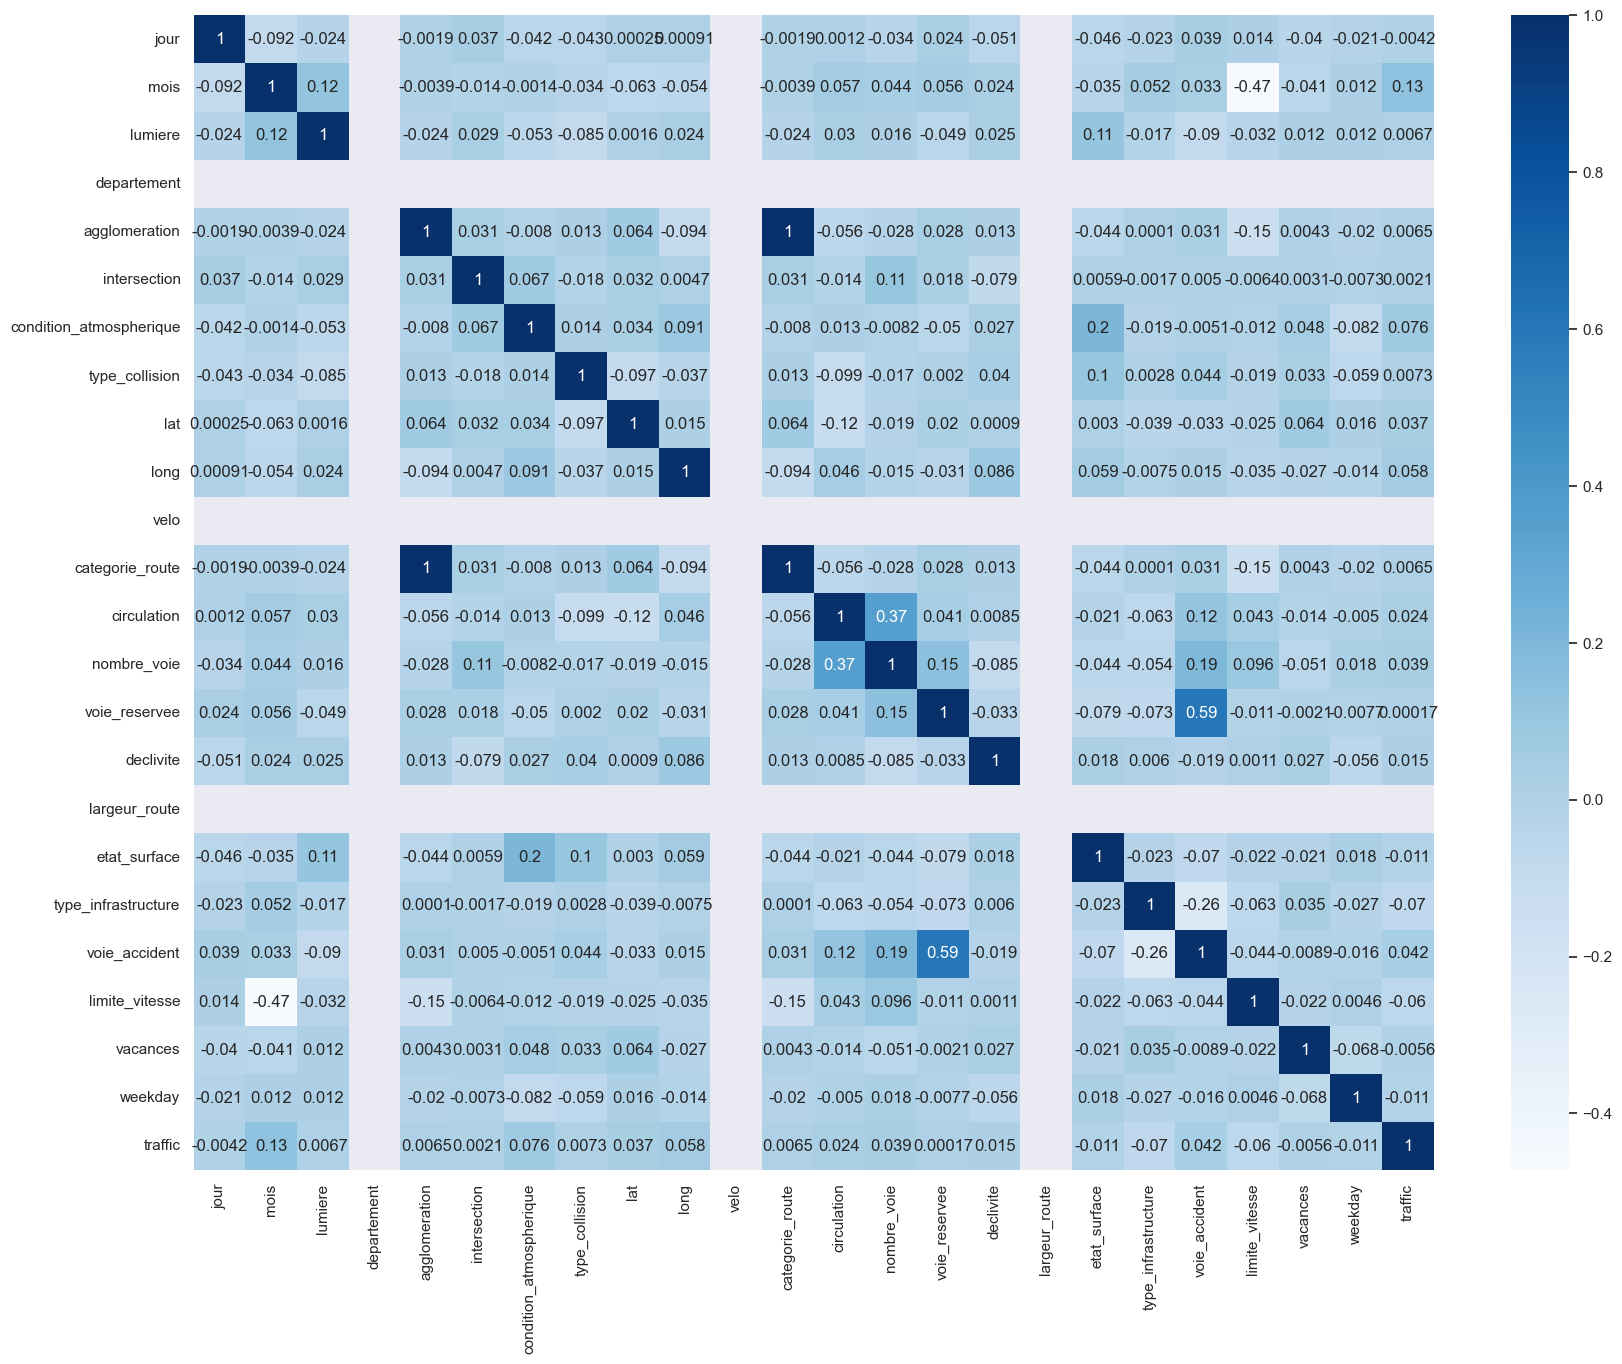

In [219]:

corr = df_corr.corr()
sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(corr, cmap="Blues", annot=True)

In [217]:
df_paris['velo']=df_paris.velo.apply(int)

/var/folders/y6/khmhfgcd2qq7v548f36tk6680000gn/T/ipykernel_2295/1291663184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_paris['velo']=df_paris.velo.apply(int)


In [231]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [232]:
# make predictions for test data
y_pred = clf.predict(X_test)
predictions = [value for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 85.01%


In [239]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

#Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

#Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
    plt.figure(figsize=(10,8))
#Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
#Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

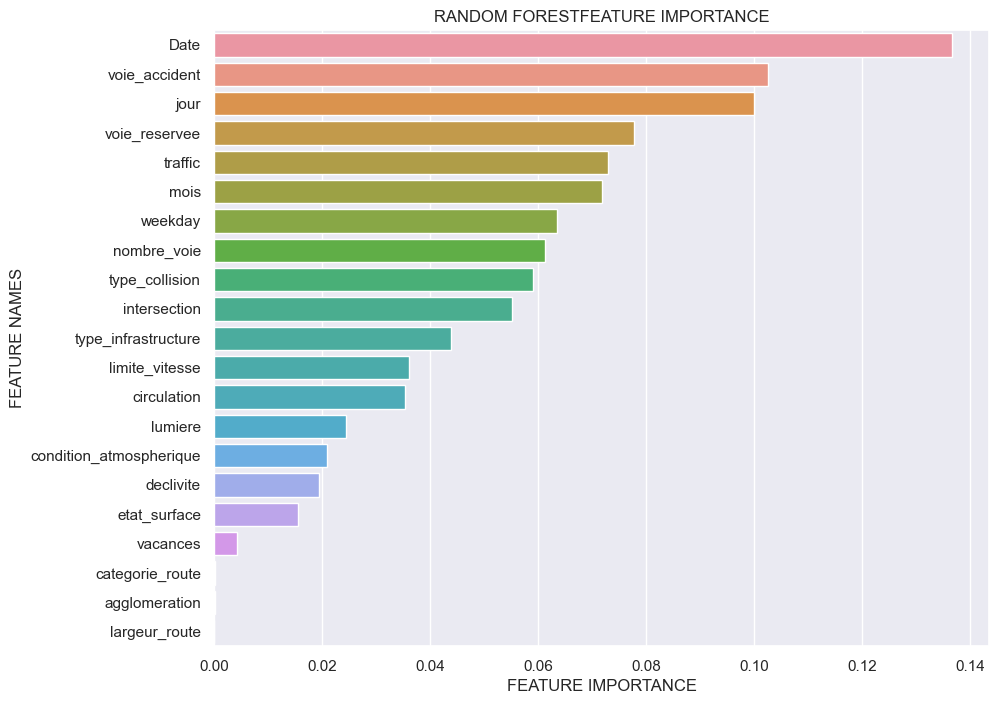

In [240]:
plot_feature_importance(clf.feature_importances_,X_train.columns,'RANDOM FOREST')